In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/cheng/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


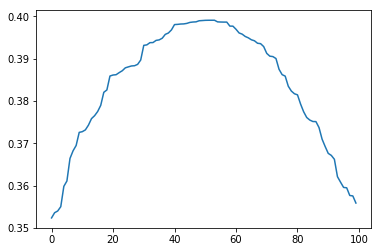

In [63]:
x = np.array([sorted(np.random.random(100)) for i in range(10000)])-0.5
def gaussian(x):
    return 1./np.sqrt(2*3.14)*np.exp(-0.5*x*x)
x = np.array([gaussian(i) for i in x])
plt.plot(x[0])

In [64]:
graph = tf.Graph()
with graph.as_default():
    inputs = tf.placeholder(tf.float32, [None, 100])
    prior_z = tf.placeholder(tf.float32, [None, 10])

    discriminator_affine1_w = tf.Variable(tf.truncated_normal([100, 50]), tf.float32) 
    discriminator_affine1_b = tf.Variable(tf.truncated_normal([50]), tf.float32)
    # discriminator_affine1_o = tf.nn.relu(tf.add(tf.matmul(inputs, discriminator_affine1_w), discriminator_affine1_b))

    discriminator_affine2_w = tf.Variable(tf.truncated_normal([50, 1]), tf.float32) 
    discriminator_affine2_b = tf.Variable(tf.truncated_normal([1]), tf.float32)
    # discriminator_affine2_o = tf.add(tf.matmul(discriminator_affine1_o, discriminator_affine2_w), discriminator_affine2_b)

    generator_affine1_w = tf.Variable(tf.truncated_normal([10, 50]), tf.float32)
    generator_affine1_b = tf.Variable(tf.truncated_normal([50]), tf.float32)
    # generator_affine1_o = tf.nn.relu(tf.add(tf.matmul(prior_z, generator_affine1_w), generator_affine1_b))

    generator_affine2_w = tf.Variable(tf.truncated_normal([50, 100]), tf.float32)
    generator_affine2_b = tf.Variable(tf.truncated_normal([100]), tf.float32)
    # generator_affine2_o = tf.nn.relu(tf.add(tf.matmul(generator_affine1_o, generator_affine2_w), generator_affine2_b))

    def discriminator(z):
        discriminator_affine1_o = tf.nn.relu(tf.add(tf.matmul(z, discriminator_affine1_w), discriminator_affine1_b))  
        outputs = tf.sigmoid(tf.add(tf.matmul(discriminator_affine1_o, discriminator_affine2_w), discriminator_affine2_b))
        return outputs, tf.nn.sigmoid(outputs)

    def generator(x):
        generator_affine1_o = tf.nn.relu(tf.add(tf.matmul(x, generator_affine1_w), generator_affine1_b))
        outputs = tf.add(tf.matmul(generator_affine1_o, generator_affine2_w), generator_affine2_b)
        return tf.nn.sigmoid(outputs)

    samples = generator(prior_z)

    fake_logits, fake = discriminator(samples)
    real_logits, real = discriminator(inputs)
    tf.summary.image('real', tf.reshape(real, [10000, 1, -1, 1]), max_outputs=1)
    tf.summary.image('fake', tf.reshape(fake, [10000, 1, -1, 1]), max_outputs=1)

    print(samples)
    print(fake_logits)
    print(real_logits)

    theta_discriminator = [discriminator_affine1_w, discriminator_affine1_b, discriminator_affine2_w, discriminator_affine2_b] 
    theta_generator = [generator_affine1_w, generator_affine1_b, generator_affine2_w, generator_affine2_b]

    generator_loss = -tf.reduce_mean(tf.log(fake))
    discriminator_loss = -tf.reduce_mean(tf.log(real) + tf.log(1-fake))

    print(generator_loss)
    print(discriminator_loss)

    optimizer_generator = tf.train.AdamOptimizer().minimize(generator_loss, var_list=theta_generator)
    optimizer_discriminator = tf.train.AdamOptimizer().minimize(discriminator_loss, var_list=theta_discriminator)

    sess = tf.Session()
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter('../gan_samples', sess.graph)
    sess.run(tf.global_variables_initializer())

Tensor("Sigmoid:0", shape=(?, 100), dtype=float32)
Tensor("Sigmoid_1:0", shape=(?, 1), dtype=float32)
Tensor("Sigmoid_3:0", shape=(?, 1), dtype=float32)
Tensor("Neg:0", shape=(), dtype=float32)
Tensor("Neg_1:0", shape=(), dtype=float32)


In [65]:
with graph.as_default():
    for i in range(1000):

        samples1 = np.array([np.random.random(10) for i in range(10000)])
        m, _, dloss = sess.run([merged, optimizer_discriminator, discriminator_loss], feed_dict={inputs:x, prior_z:samples1})
        samples1 = np.array([np.random.random(10) for i in range(10000)])
        _, gloss = sess.run([optimizer_generator, generator_loss], feed_dict={prior_z:samples1})
        
        if i%10 == 0:
            print('D_loss => %f    G_loss => %f'%(dloss, gloss))
#             m = sess.run([merged], feed_dict={inputs:x, prior_z:samples})
            writer.add_summary(m, i)

D_loss => 1.626480    G_loss => 0.313257
D_loss => 1.626454    G_loss => 0.313261
D_loss => 1.626274    G_loss => 0.313353
D_loss => 1.625549    G_loss => 0.314239
D_loss => 1.619185    G_loss => 0.318831
D_loss => 1.607727    G_loss => 0.334226
D_loss => 1.610716    G_loss => 0.328953
D_loss => 1.600526    G_loss => 0.340617
D_loss => 1.590724    G_loss => 0.349711
D_loss => 1.572446    G_loss => 0.363535
D_loss => 1.539372    G_loss => 0.399430
D_loss => 1.460517    G_loss => 0.455790
D_loss => 1.368704    G_loss => 0.514612
D_loss => 1.237695    G_loss => 0.594400
D_loss => 1.127698    G_loss => 0.641999
D_loss => 1.114427    G_loss => 0.645479
D_loss => 1.153451    G_loss => 0.620586
D_loss => 1.218575    G_loss => 0.587799
D_loss => 1.313950    G_loss => 0.547367
D_loss => 1.416797    G_loss => 0.482215
D_loss => 1.496642    G_loss => 0.425664
D_loss => 1.554543    G_loss => 0.375353
D_loss => 1.603237    G_loss => 0.335408
D_loss => 1.622411    G_loss => 0.319099
D_loss => 1.6260

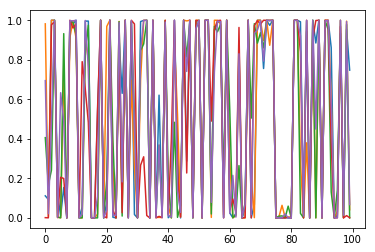

In [60]:
with graph.as_default():
    ss = np.array([np.random.random(10) for i in range(200)])
    s = sess.run([samples], feed_dict={prior_z:ss})
    for i in range(5):
        plt.plot(s[0][i])